In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
comprehensive_df = pd.read_csv('comprehensive_df.csv')

In [19]:
#eeplace "not in squad during this season" with 0
comprehensive_df['Appearances'] = comprehensive_df['Appearances'].replace("Not in squad during this season", 0)

#convert the appearances column to numeric
comprehensive_df['Appearances'] = pd.to_numeric(comprehensive_df['Appearances'])

In [20]:
#convert specified columns to numeric values
numeric_columns = ['Age', 'In Squad', 'Goals', 'Assists', 'Yellow Cards', 'Second Yellows', 'Straight Reds', 'Substituted On', 'Substituted Off', 'PPG', 'Placement']

for col in numeric_columns:
    comprehensive_df[col] = pd.to_numeric(comprehensive_df[col], errors='coerce')

In [21]:
comprehensive_vague_positions_df = comprehensive_df.copy()

#function to categorize positions
def categorize_position(position):
    if "Back" in position or "Defender" in position:
        return "Defender"
    elif "Midfield" in position:
        return "Midfielder"
    elif "Goalkeeper" in position:
        return "Goalkeeper"
    else:
        return "Attacker"

#apply the function to the position column
comprehensive_vague_positions_df['Position'] = comprehensive_vague_positions_df['Position'].apply(categorize_position)

In [22]:
comprehensive_vague_positions_df.head(20)

,Player,Age,Position,Kit Number,Nationality,In Squad,Appearances,Goals,Assists,Yellow Cards,...,Minutes Played,Club,Season,Team,Placement,League,Champions League,Domestic Cup,TOTY,TOTY_Nominee
0,oier olazabal,18,Goalkeeper,0,Spain,2,1,0,0,0,...,90.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
1,victor valdes,26,Goalkeeper,1,Spain,52,49,0,0,3,...,4410.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
2,jose manuel pinto,32,Goalkeeper,13,Spain,51,11,0,0,1,...,990.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
3,albert jorquera,29,Goalkeeper,25,Spain,20,1,0,0,0,...,90.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
4,andreu fontas,18,Defender,0,Spain,1,0,0,0,0,...,0.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
5,alberto botia,19,Defender,0,Spain,5,1,0,0,0,...,27.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
6,martin caceres,21,Defender,2,Uruguay,51,23,0,0,3,...,1523.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
7,marc muniesa,16,Defender,0,Spain,2,1,0,0,0,...,31.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
8,gerard pique,21,Defender,3,Spain,50,45,3,1,7,...,3932.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0
9,rafa marquez,29,Defender,4,Mexico,41,37,3,3,7,...,3020.0,FC Barcelona,2008/2009,fc-barcelona,1,laliga,1,1,0,0


In [23]:
comprehensive_vague_positions_df.dtypes

Player               object
Age                   int64
Position             object
Kit Number            int64
Nationality          object
In Squad              int64
Appearances           int64
Goals                 int64
Assists               int64
Yellow Cards          int64
Second Yellows        int64
Straight Reds         int64
Substituted On        int64
Substituted Off       int64
PPG                 float64
Minutes Played      float64
Club                 object
Season               object
Team                 object
Placement             int64
League               object
Champions League      int64
Domestic Cup          int64
TOTY                  int64
TOTY_Nominee          int64
dtype: object

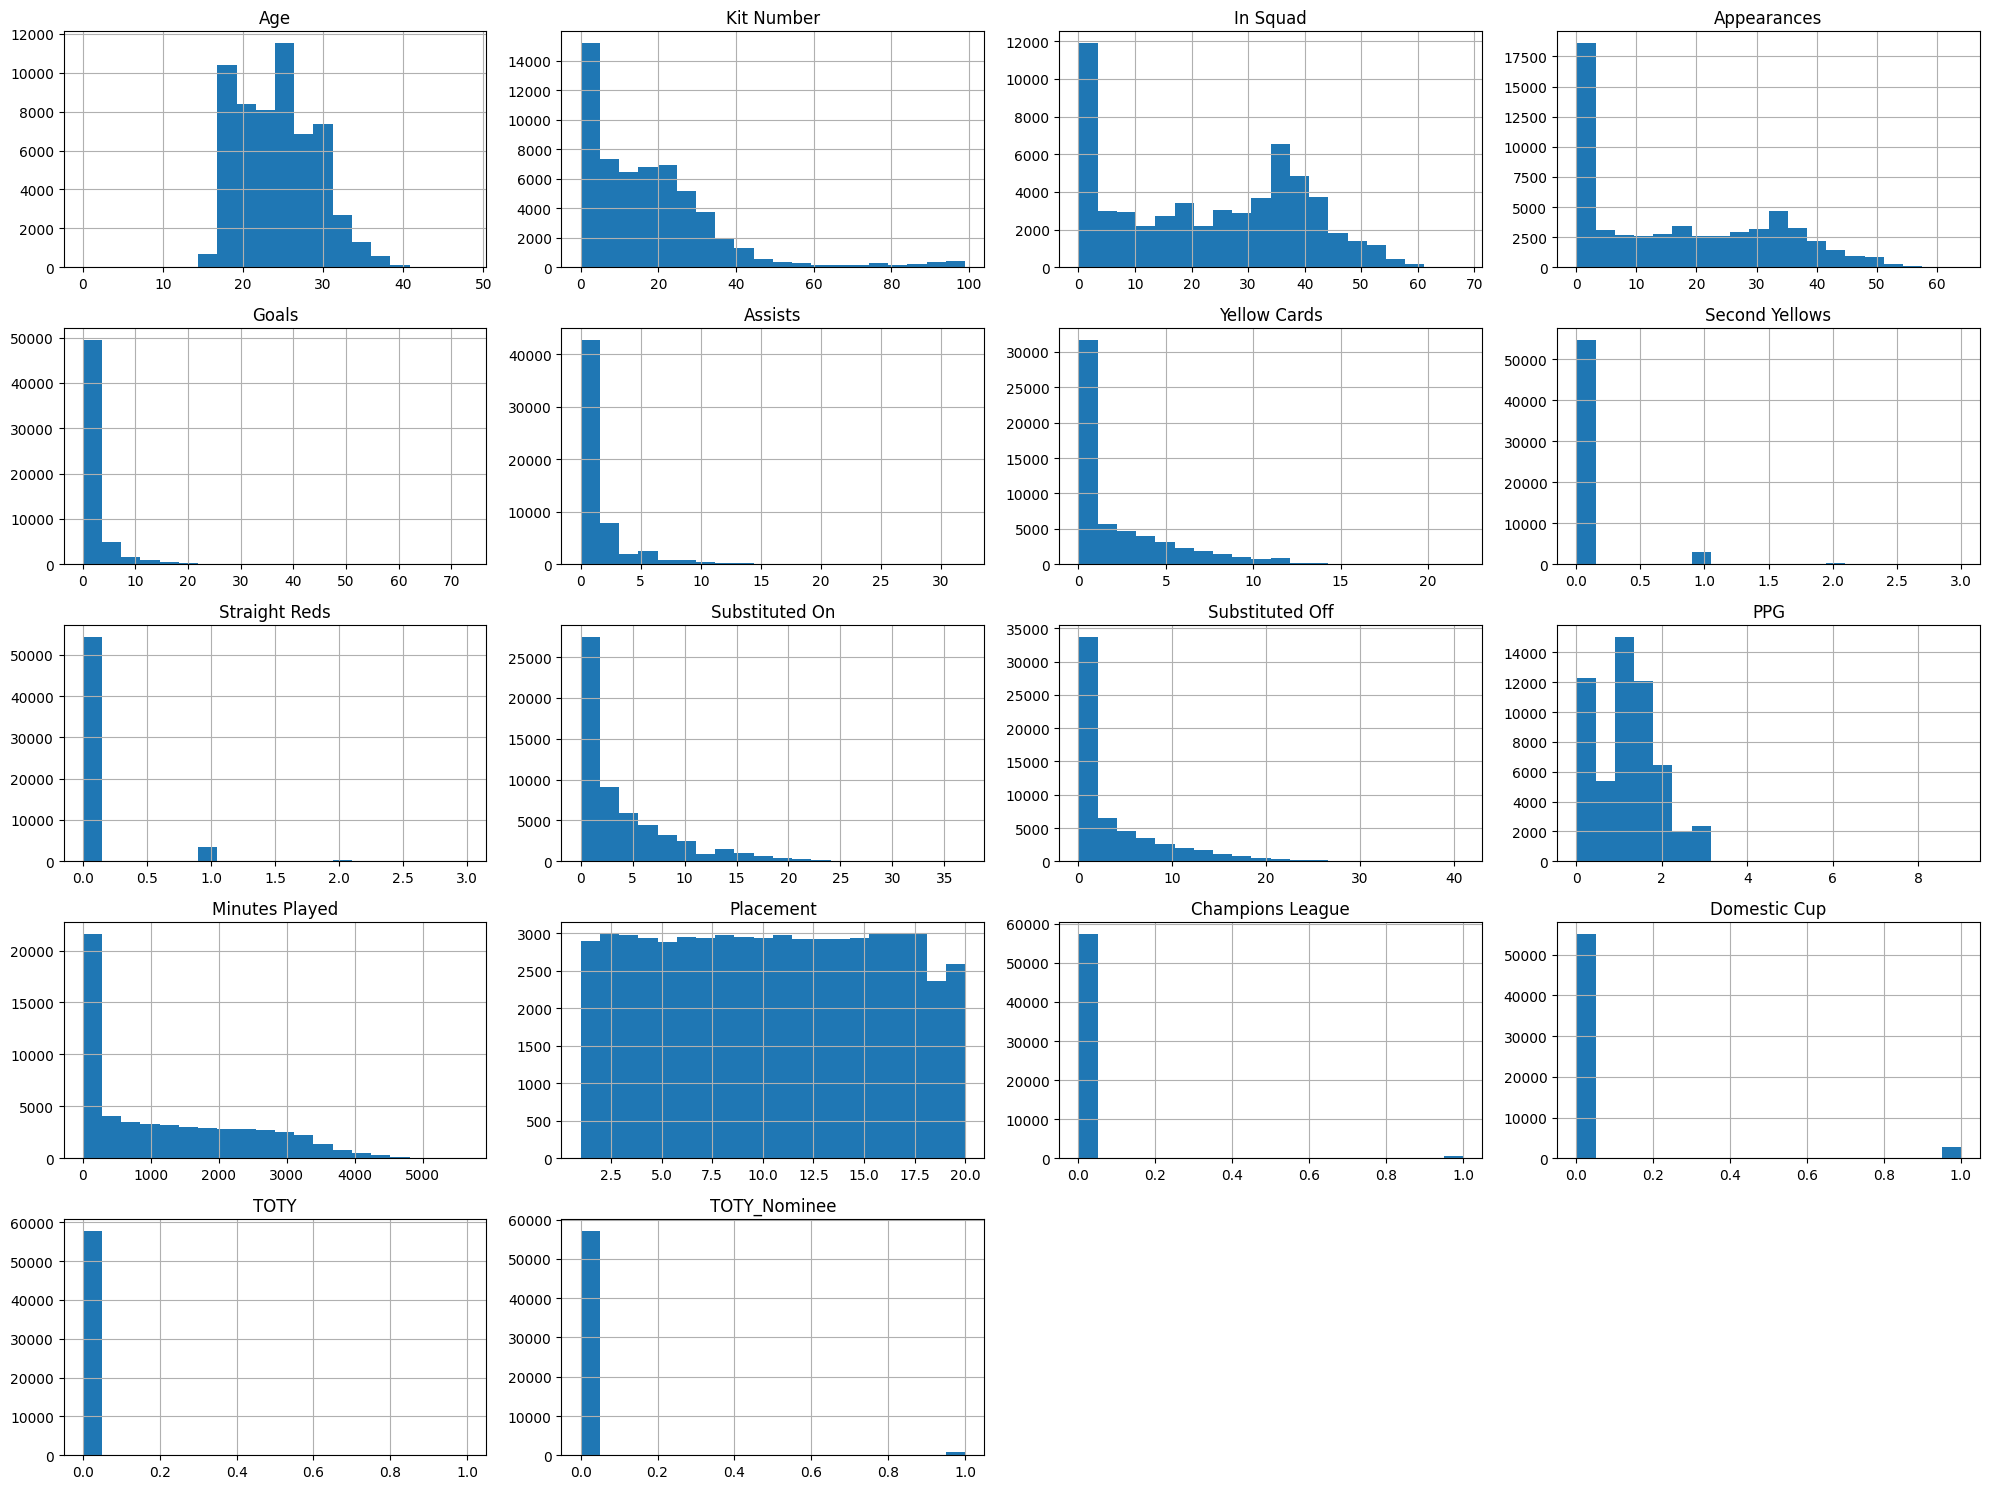

In [24]:
#plot histograms for all features
comprehensive_vague_positions_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [25]:
#filter out players with appearances 5 and below
comprehensive_vague_positions_df = comprehensive_vague_positions_df[comprehensive_vague_positions_df['Appearances'] > 10]

In [26]:
#check for NaN values in the df
print("NaN values in each column:")
print(comprehensive_vague_positions_df.isnull().sum())

NaN values in each column:
Player              605
Age                   0
Position              0
Kit Number            0
Nationality           0
In Squad              0
Appearances           0
Goals                 0
Assists               0
Yellow Cards          0
Second Yellows        0
Straight Reds         0
Substituted On        0
Substituted Off       0
PPG                   1
Minutes Played        0
Club                  0
Season                0
Team                  0
Placement             0
League                0
Champions League      0
Domestic Cup          0
TOTY                  0
TOTY_Nominee          0
dtype: int64


In [27]:
#drop the player, kit Number, and nationality columns
comprehensive_vague_positions_df.drop(columns=['Player', 'Kit Number', 'Nationality', 'Team', 'Club'], inplace=True)

In [28]:
#one-hot encode the league and position columns separately
comprehensive_vague_positions_df = pd.get_dummies(comprehensive_vague_positions_df, columns=['League', 'Position'])

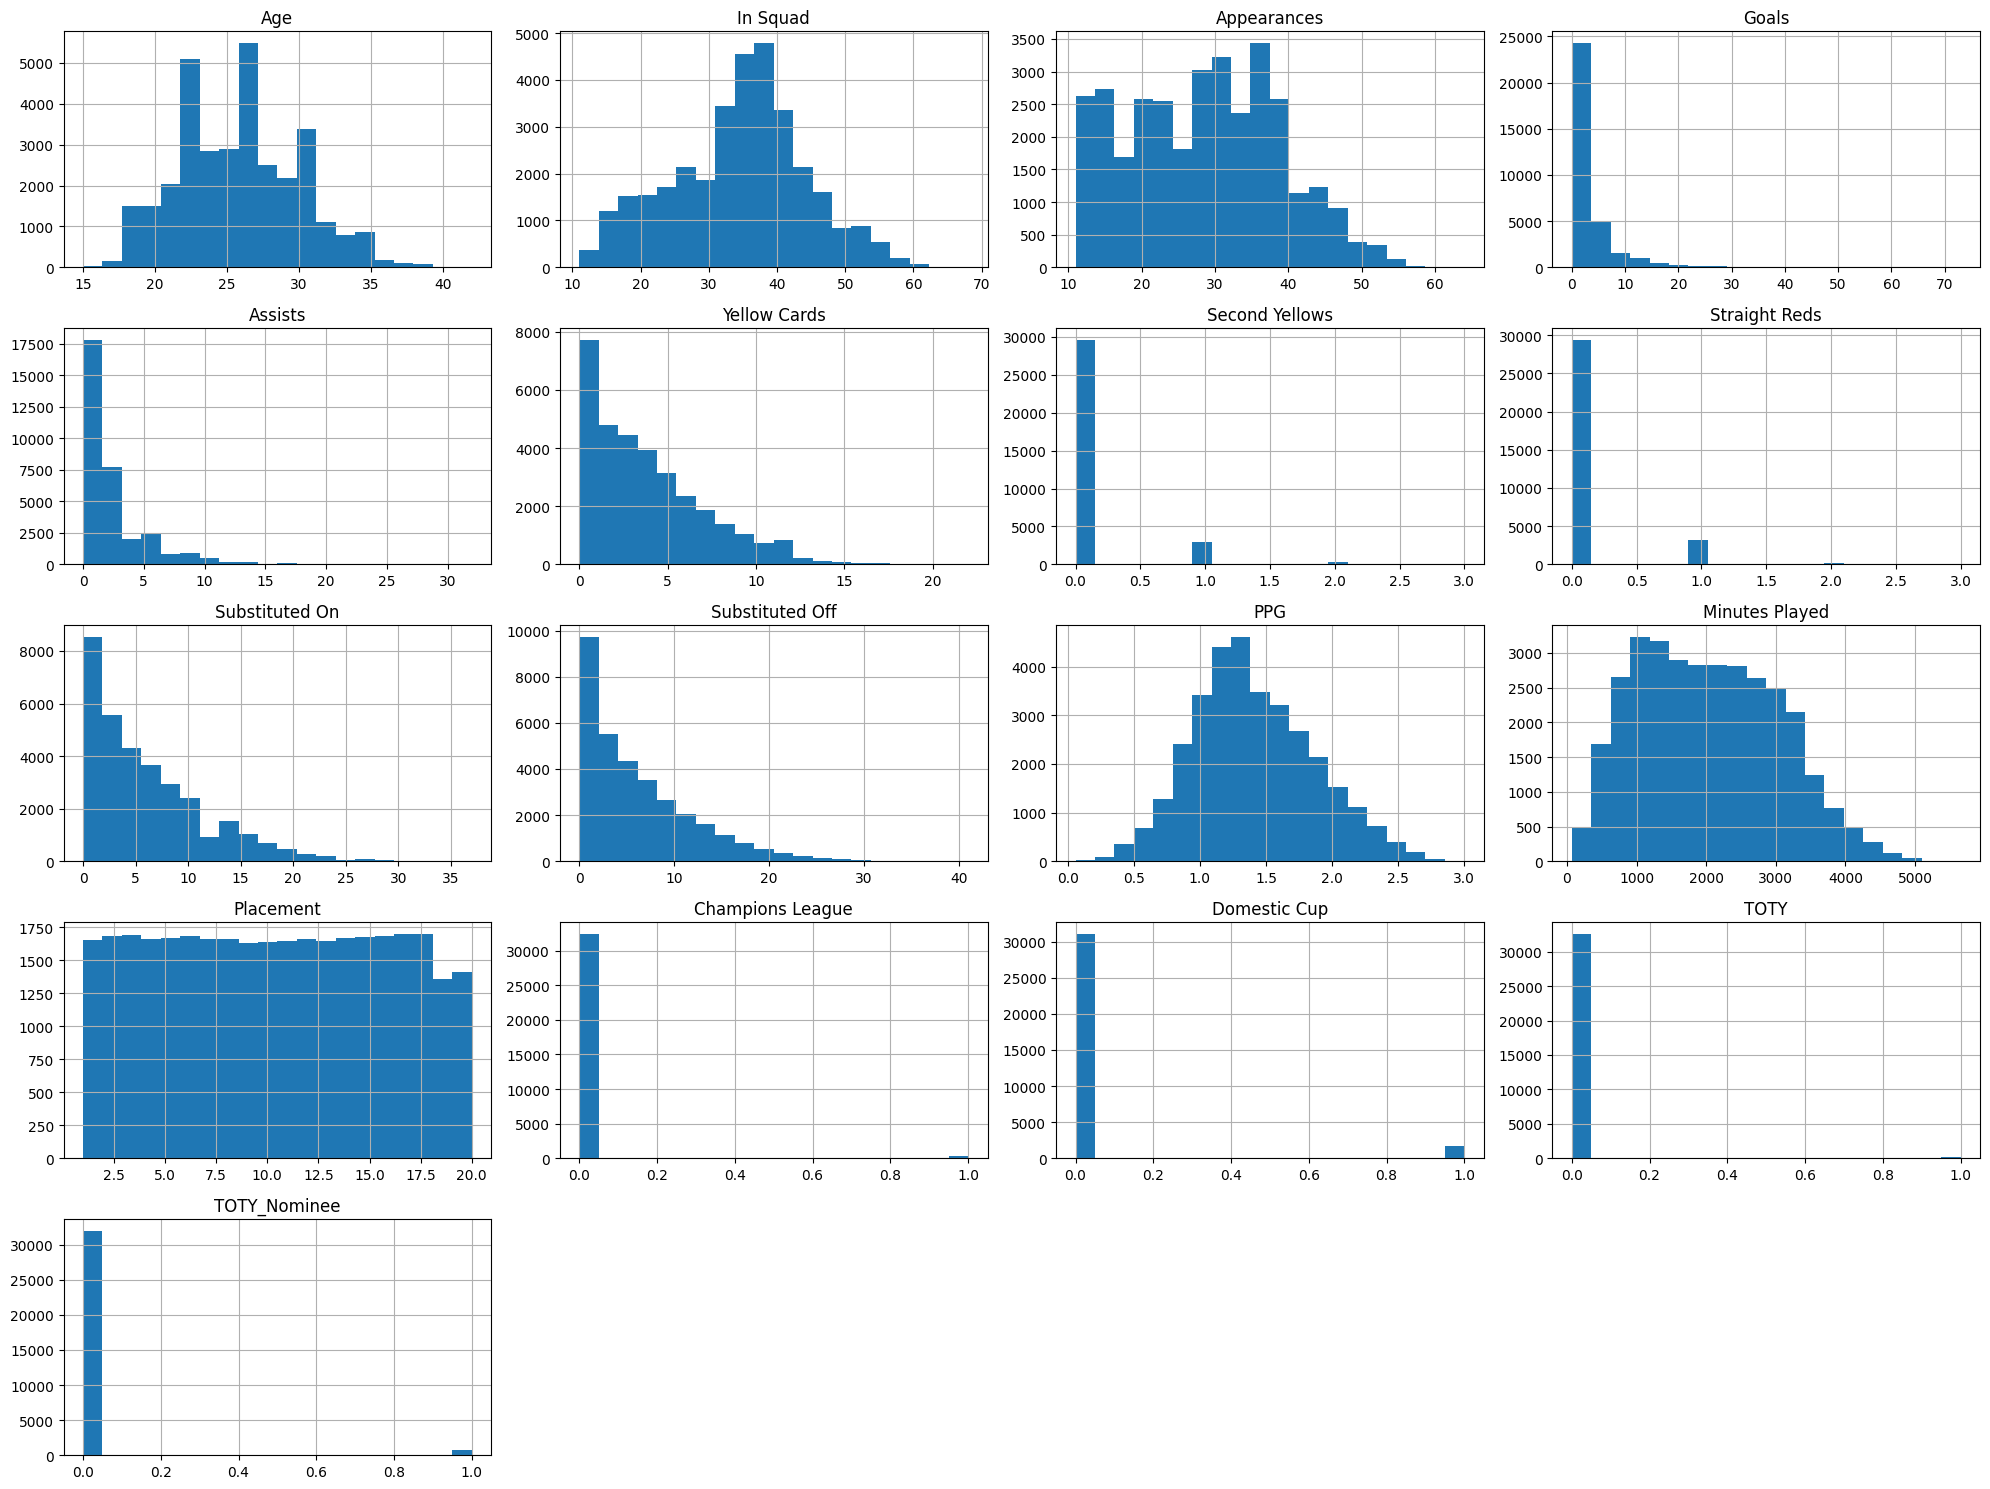

In [29]:
#plot histograms for all numerical features
comprehensive_vague_positions_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [30]:
#check for NaN values in the df
print("NaN values in each column:")
print(comprehensive_vague_positions_df.isnull().sum())

NaN values in each column:
Age                      0
In Squad                 0
Appearances              0
Goals                    0
Assists                  0
Yellow Cards             0
Second Yellows           0
Straight Reds            0
Substituted On           0
Substituted Off          0
PPG                      1
Minutes Played           0
Season                   0
Placement                0
Champions League         0
Domestic Cup             0
TOTY                     0
TOTY_Nominee             0
League_bundesliga        0
League_laliga            0
League_ligue-1           0
League_premier-league    0
League_serie-a           0
Position_Attacker        0
Position_Defender        0
Position_Goalkeeper      0
Position_Midfielder      0
dtype: int64


In [31]:
#handle NaN values in the PPG column
ppg_median = comprehensive_vague_positions_df['PPG'].median()
comprehensive_vague_positions_df['PPG'] = comprehensive_vague_positions_df['PPG'].fillna(ppg_median)

In [32]:
#check for NaN values in the df again
print("NaN values in each column:")
print(comprehensive_vague_positions_df.isnull().sum())

NaN values in each column:
Age                      0
In Squad                 0
Appearances              0
Goals                    0
Assists                  0
Yellow Cards             0
Second Yellows           0
Straight Reds            0
Substituted On           0
Substituted Off          0
PPG                      0
Minutes Played           0
Season                   0
Placement                0
Champions League         0
Domestic Cup             0
TOTY                     0
TOTY_Nominee             0
League_bundesliga        0
League_laliga            0
League_ligue-1           0
League_premier-league    0
League_serie-a           0
Position_Attacker        0
Position_Defender        0
Position_Goalkeeper      0
Position_Midfielder      0
dtype: int64


In [33]:
seasons = [
    '2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
    '2013/2014', '2014/2015', '2015/2016', '2016/2017', '2017/2018',
    '2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023', '2023/2024'
]

#create mapping from season to integer
season_mapping = {season: idx + 1 for idx, season in enumerate(seasons)}


#ONE HOT ENCODING HAPPENS HERE CHANGE DEFENSIVE CATEGORIES BEFORE THIS POINT

#map the 'Season' column to numeric values
comprehensive_vague_positions_df['Season'] = comprehensive_vague_positions_df['Season'].map(season_mapping)

                            Age  In Squad  Appearances     Goals   Assists  \
Age                    1.000000  0.042783     0.054864 -0.011440 -0.044131   
In Squad               0.042783  1.000000     0.796984  0.271449  0.334370   
Appearances            0.054864  0.796984     1.000000  0.416608  0.480794   
Goals                 -0.011440  0.271449     0.416608  1.000000  0.569909   
Assists               -0.044131  0.334370     0.480794  0.569909  1.000000   
Yellow Cards           0.064512  0.299978     0.445073  0.093616  0.167621   
Second Yellows         0.007744  0.028178     0.063198 -0.014129 -0.005697   
Straight Reds          0.039378  0.021113     0.062678  0.001975 -0.006771   
Substituted On        -0.156973  0.164252     0.046642  0.127424  0.106029   
Substituted Off       -0.058443  0.249916     0.388604  0.453780  0.491037   
PPG                   -0.002388  0.391888     0.298504  0.213277  0.286200   
Minutes Played         0.116935  0.665176     0.895684  0.313376

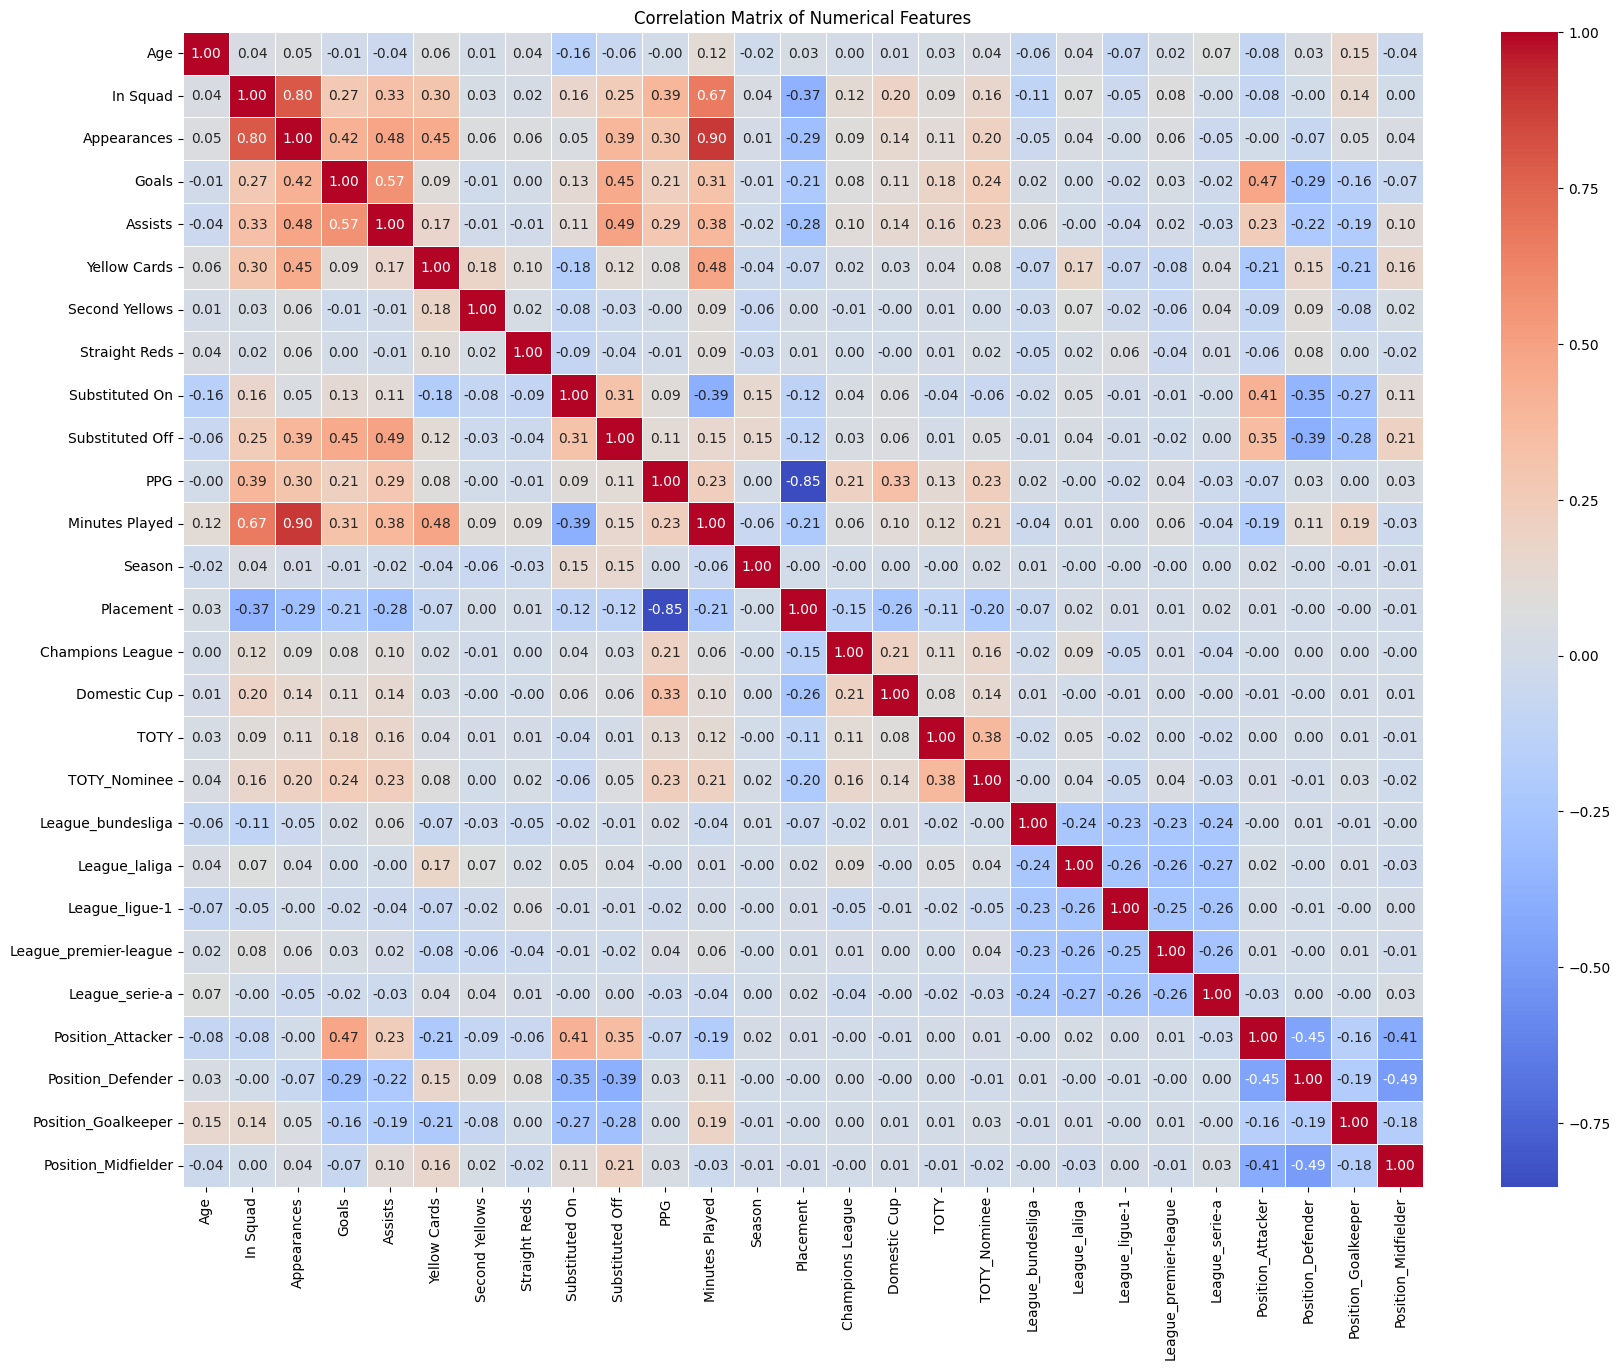

In [34]:
correlation_matrix = comprehensive_vague_positions_df.corr()

#print the correlation matrix
print(correlation_matrix)

#set the size of the plot
plt.figure(figsize=(20, 15))

#create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#set the title
plt.title('Correlation Matrix of Numerical Features')

#show the plot
plt.show()

In [107]:
comprehensive_vague_positions_df.to_csv('vague_position_model_data.csv', index=False)